Restaurar o banco imobiliária com arquivo imobiliaria.backup; 
● Criar endpoint de get, que deve selecionar os dados dentro de um intervalo de area, plotar o gráfico de dispersão em que o eixo x é a área e o eixo y o preco e retornar o json com esses dados; 
● Criar endpoint de get, que deve selecionar os 15 dados com maior preco em ordem decrescente, plotar o gráfico de linha em que o eixo x é o preco e o eixo y a qte_quartos e retornar o json com esses dados; 
● Criar endpoint de get, que deve selecionar todos os dados com determinada quantidade de qte_banheiros, plotar o gráfico de barra em que o eixo x é o qte_banheiros e o eixo y a qte_quartos e retornar o json com esses dados; 
● Criar endpoint de put, que atualize os dados pelo cep; 
● Criar endpoint de delete, que delete os dados pelo cep;

In [2]:

import psycopg2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from flask import Flask, request
%matplotlib inline

con = psycopg2.connect(host = 'localhost' , database = 'imobiliaria', user = 'postgres', password = 'postgres')


* Criar endpoint de get, que deve selecionar os dados dentro de um intervalo de area, plotar o gráfico de dispersão em que o eixo x é a área e o eixo y o preco e retornar o json com esses dados; 

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


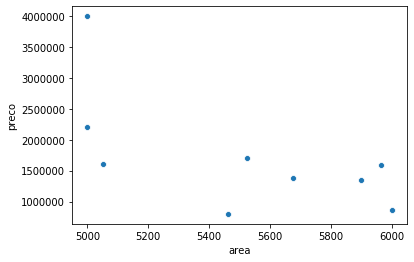

127.0.0.1 - - [29/Feb/2020 18:44:33] "GET /area/5000/6000 HTTP/1.1" 200 -


In [ ]:

con = psycopg2.connect(host = 'localhost' , database = 'imobiliaria', user = 'postgres', password = 'postgres')

app = Flask(__name__)

@app.route('/area/<a_min>/<a_max>', methods = ['GET'])

def area_preco(a_min,a_max):
    
    query = 'SELECT * FROM info_casas WHERE area BETWEEN {} AND {};'.format(a_min, a_max)
    df = pd.read_sql(query,con)
    sns.scatterplot(df['area'],df['preco'])
    plt.show()
        
    return df.to_json(orient = 'records'),200
    

    
app.run()

* Criar endpoint de get, que deve selecionar os 15 dados com maior preco em ordem decrescente, plotar o gráfico de linha em que o eixo x é o preco e o eixo y a qte_quartos e retornar o json com esses dados;

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


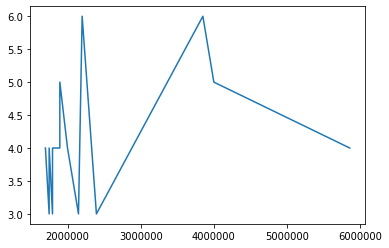

[2020-02-29 18:45:31,126] ERROR in app: Exception on /maior_preco15 [GET]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-2-f10d6729a62f>", line 10, in maior_preco15
    return

In [ ]:

app = Flask(__name__)

@app.route('/maior_preco15', methods=['GET'])

def maior_preco15 ():
    query = 'SELECT * from info_casas ORDER BY preco DESC LIMIT 15;'
    df = pd.read_sql(query,con)
    plt.plot(df['preco'],df['qte_quartos'])
    plt.show()
    return df.to_jason(orient = 'records'),200

app.run()

* Criar endpoint de get, que deve selecionar todos os dados com determinada quantidade de qte_banheiros,plotar o histograma com a quantidade de quartos; 

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


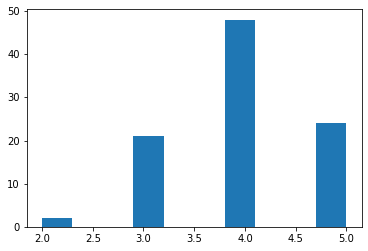

127.0.0.1 - - [29/Feb/2020 18:47:51] "GET /qte_banheiros/3 HTTP/1.1" 200 -
127.0.0.1 - - [29/Feb/2020 18:49:41] "PUT /up_cep/62088 HTTP/1.1" 404 -


In [ ]:
app = Flask(__name__)

@app.route("/qte_banheiros/<b>", methods = ['GET'])

def qte_banheiros(b):
    
    query = "SELECT * FROM info_casas WHERE qte_banheiros = {};".format(b)
    df = pd.read_sql(query, con)
    plt.hist(df['qte_quartos'])
    plt.show()
    return df.to_json(orient = 'records'), 200
    
app.run()

* Criar endpoint de put, que atualize os dados pelo cep;

In [ ]:
cur = con.cursor()

app = Flask(__name__)

@app.route("/up_cep/<cep>", methods = ['PUT'])

def up_cep(cep):
    post_args = request.json
    
    query = "UPDATE info_casas SET qte_quartos = {}, qte_banheiros = {}, area = {}, preco = {} WHERE cep = {}".format(
        post_args["qte_quartos"], post_args["qte_banheiros"], post_args["area"], post_args["preco"], cep)

    
    cur.execute(query)
    con.commit()
    return "sucesso", 200
    
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Feb/2020 18:50:52] "PUT /up_cep/62088 HTTP/1.1" 200 -


* Criar endpoint de delete, que delete os dados pelo cep;

In [ ]:

cur = con.cursor()

app = Flask(__name__)

@app.route("/del/<cep>", methods = ['DELETE'])

def delete(cep):
    
    sql = "DELETE FROM info_casas WHERE cep = {};"
    cur.execute(sql.format(int(cep)))
    con.commit()
    return 'OK'

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Feb/2020 18:42:27] "DELETE /del/62088 HTTP/1.1" 200 -
